In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
print(len(reviews))
print(len(orders))
# reviews中review_score列没有空值

99224
99441


In [ ]:
# merged_df = pd.merge(reviews, orders, on='order_id', how='inner')
# merged_df = merged_df['review_score']
# print(merged_df.head())
# print(len(merged_df))

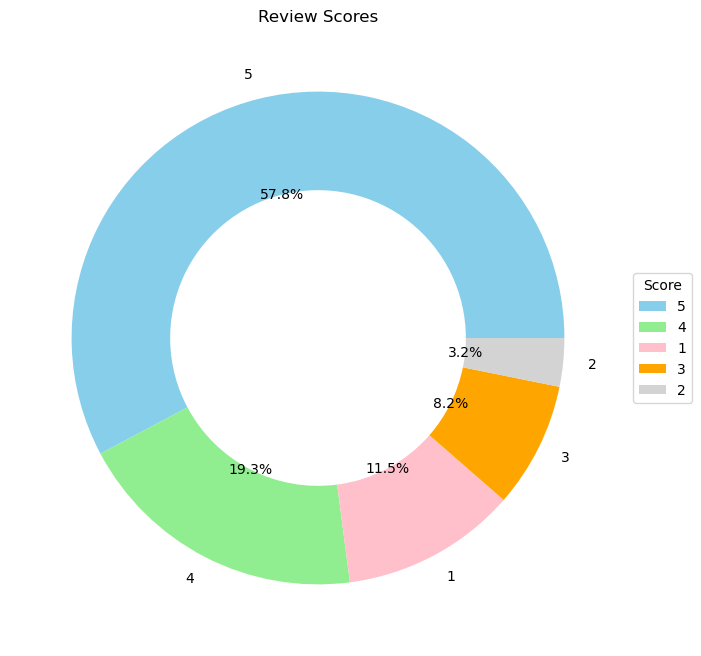

In [13]:

# 计算每个评分的数量
score_counts = reviews['review_score'].value_counts()

colors = ['skyblue', 'lightgreen', 'pink', 'orange', 'lightgrey']

# 绘制环状图
plt.figure(figsize=(8, 8))
plt.pie(score_counts, labels=score_counts.index, autopct='%1.1f%%', colors=colors, wedgeprops=dict(width=0.4))

# 设置标题
plt.title('Review Scores')

# 将图例放在旁边
plt.legend(title='Score', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


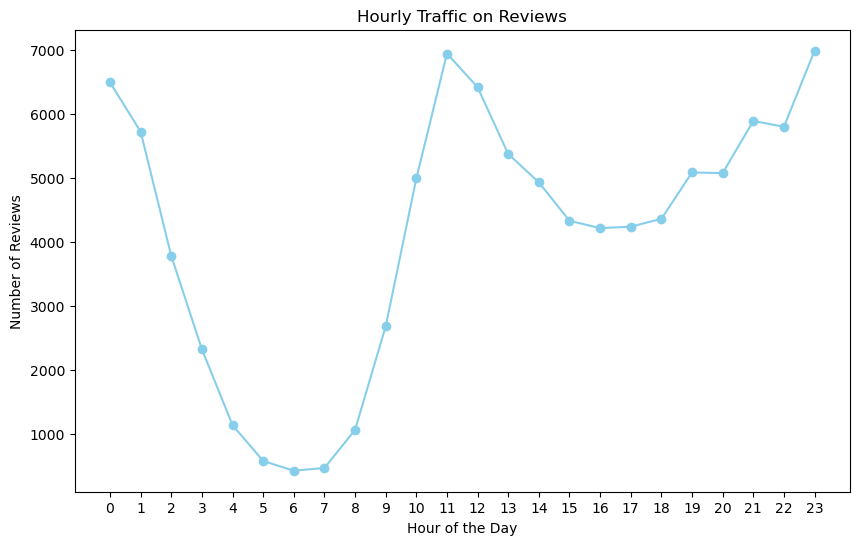

In [26]:

# 假设你已经有了名为reviews的DataFrame，其中包含了review_answer_timestamp列

# 将review_answer_timestamp列转换为datetime类型
reviews['review_answer_timestamp'] = pd.to_datetime(reviews['review_answer_timestamp'])

# 提取小时信息
reviews['hour'] = reviews['review_answer_timestamp'].dt.hour

# 计算每小时的数量
hourly_counts = reviews.groupby('hour').size()

# 绘制折线图
plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='line', marker='o', color='skyblue')
plt.title('Hourly Traffic on Reviews')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Reviews')
plt.grid(False)
plt.xticks(range(24))
plt.show()


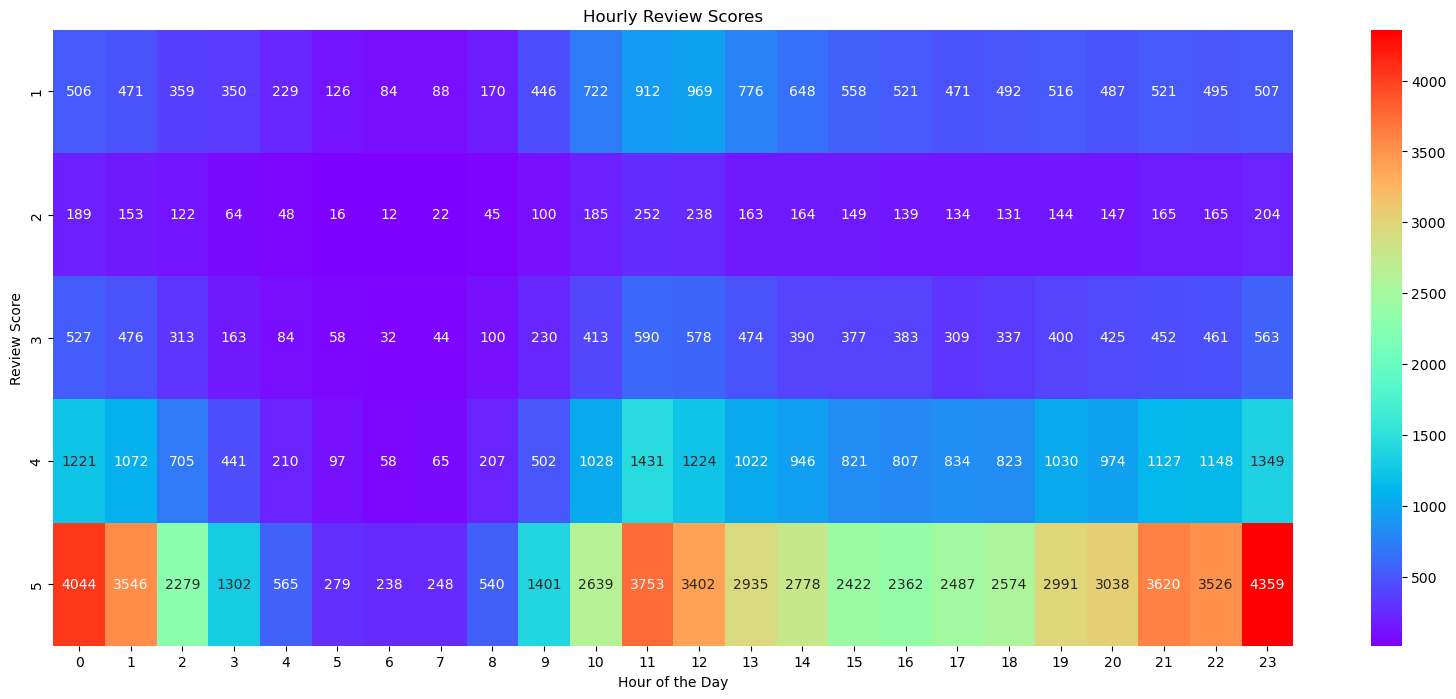

In [34]:

# 将review_answer_timestamp列转换为datetime类型
reviews['review_answer_timestamp'] = pd.to_datetime(reviews['review_answer_timestamp'])

# 提取小时信息和评分
reviews['hour'] = reviews['review_answer_timestamp'].dt.hour

# 绘制热力图
plt.figure(figsize=(20, 8))
heatmap_data = reviews.pivot_table(index='review_score', columns='hour', aggfunc='size')
sns.heatmap(heatmap_data, cmap='rainbow', annot=True, fmt='g')
plt.title('Hourly Review Scores')
plt.xlabel('Hour of the Day')
plt.ylabel('Review Score')
plt.show()
